titoli selezionati facenti parte di:
- settore tecnologico:  1) NVIDIA data l'esplosione dell'intelligenza artificiale
                        2) INTEL attualmente scontato ottima opportunità
- settore della sanità: 1) Johnosn e Johnson
                        2) PFIZER
- settore finanziario:  1) JPMorgan Chase (JPM)
                        2) Bank Of America (GS)

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf # per il download dei dati storici dei titoli
import matplotlib.pyplot as plt # per il plot dei grafici
import datetime as dt # per la gestione delle date

In [2]:
#iniziamo a scaricare i dati storici dei titoli
start_date = dt.datetime(2014,5,31)
end_date = dt.datetime(2024,5,31)

tickers = ["NVDA", "INTC", "PFE", "JNJ", "JPM", "BAC"]
# scarichiamo i dati di tutti i titoli

data_df = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
#riordiniamo le colonne 
data_df = data_df[tickers]
data_df.head(10)

[*********************100%%**********************]  6 of 6 completed


Ticker,NVDA,INTC,PFE,JNJ,JPM,BAC
Date,,,,,,
2014-06-02,4.507793,20.772066,19.234695,77.708099,41.902771,12.532160
2014-06-03,4.488754,21.076866,19.157011,77.928696,42.092037,12.491097
2014-06-04,4.493515,21.031141,19.189377,78.096008,42.152607,12.491097
2014-06-05,4.512556,21.076866,19.267071,78.506744,42.871811,12.671771
2014-06-06,4.529214,21.465481,19.046947,78.476318,43.129200,12.803168
2014-06-09,4.533975,21.267359,19.001627,78.506744,43.469868,13.008481
2014-06-10,4.557774,21.518822,19.098743,79.176033,43.833263,13.074179
2014-06-11,4.617276,21.282604,19.053419,78.582787,43.356308,12.803168
2014-06-12,4.645837,21.305462,19.066376,77.981926,43.182198,12.663556


In [3]:
#piccola pulizia dei dati
data_df = data_df.dropna()

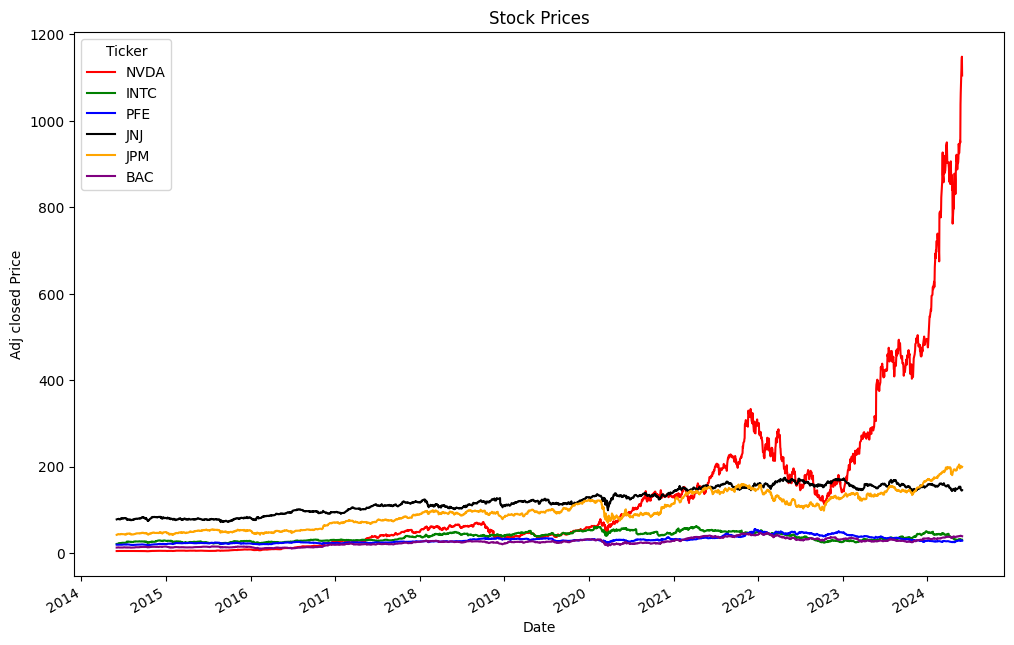

In [4]:
#grafico dei dati
#costruiamo una lista di colori per i titoli in modo che siano sempre uguali
colors = ["red", "green", "blue", "black", "orange", "purple"]
data_df.plot(figsize=(12,8), color=colors)
plt.ylabel("Adj closed Price")
plt.title("Stock Prices")
plt.savefig("./images/stock_prices.png")
plt.show()

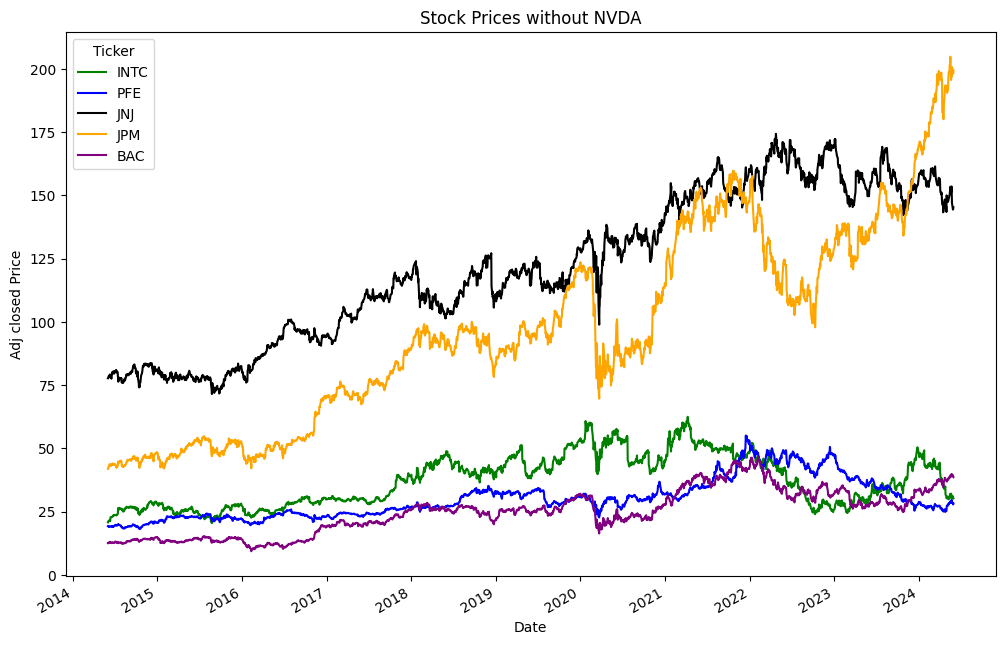

In [5]:
#plottiamo tutti i titoli tranne NVDA
data_df.drop("NVDA", axis=1).plot(figsize=(12,8), color=colors[1:])
plt.ylabel("Adj closed Price")
plt.savefig("./images/stocksWithoutNVDA.png")
plt.title("Stock Prices without NVDA")
plt.show()

2) RENDIMENTI

In [6]:
rsNetti_df = data_df.pct_change().dropna()
rsNetti_df.columns = [col + "_RSnetto" for col in rsNetti_df.columns]
rsNetti_df.head()

,NVDA_RSnetto,INTC_RSnetto,PFE_RSnetto,JNJ_RSnetto,JPM_RSnetto,BAC_RSnetto
Date,,,,,,
2014-06-03,-0.004224,0.014674,-0.004039,0.002839,0.004517,-0.003277
2014-06-04,0.001061,-0.002169,0.001690,0.002147,0.001439,0.000000
2014-06-05,0.004238,0.002174,0.004049,0.005259,0.017062,0.014464
2014-06-06,0.003692,0.018438,-0.011425,-0.000388,0.006004,0.010369
2014-06-09,0.001051,-0.009230,-0.002379,0.000388,0.007899,0.016036


In [7]:
rsLordi_df = rsNetti_df + 1
rsLordi_df.columns = [col.replace("RSnetto", "RSlordo") for col in rsLordi_df.columns]
rsLordi_df.head()

,NVDA_RSlordo,INTC_RSlordo,PFE_RSlordo,JNJ_RSlordo,JPM_RSlordo,BAC_RSlordo
Date,,,,,,
2014-06-03,0.995776,1.014674,0.995961,1.002839,1.004517,0.996723
2014-06-04,1.001061,0.997831,1.001690,1.002147,1.001439,1.000000
2014-06-05,1.004238,1.002174,1.004049,1.005259,1.017062,1.014464
2014-06-06,1.003692,1.018438,0.988575,0.999612,1.006004,1.010369
2014-06-09,1.001051,0.990770,0.997621,1.000388,1.007899,1.016036


In [8]:
rsLogaritmici_df = np.log(rsLordi_df)
rsLogaritmici_df.columns = [col.replace("RSlordo", "Rlog") for col in rsLogaritmici_df.columns]
rsLogaritmici_df.head()

,NVDA_Rlog,INTC_Rlog,PFE_Rlog,JNJ_Rlog,JPM_Rlog,BAC_Rlog
Date,,,,,,
2014-06-03,-0.004233,0.014567,-0.004047,0.002835,0.004507,-0.003282
2014-06-04,0.001060,-0.002172,0.001688,0.002145,0.001438,0.000000
2014-06-05,0.004229,0.002172,0.004041,0.005246,0.016918,0.014361
2014-06-06,0.003685,0.018270,-0.011491,-0.000388,0.005986,0.010316
2014-06-09,0.001051,-0.009273,-0.002382,0.000388,0.007868,0.015909


In [9]:
cum_df = rsLordi_df.cumprod()
cum_df.columns = [col.replace("RSlordo", "Rcomposito") for col in cum_df.columns]
cum_df.head()

,NVDA_Rcomposito,INTC_Rcomposito,PFE_Rcomposito,JNJ_Rcomposito,JPM_Rcomposito,BAC_Rcomposito
Date,,,,,,
2014-06-03,0.995776,1.014674,0.995961,1.002839,1.004517,0.996723
2014-06-04,0.996832,1.012472,0.997644,1.004992,1.005962,0.996723
2014-06-05,1.001057,1.014674,1.001683,1.010278,1.023126,1.011140
2014-06-06,1.004752,1.033382,0.990239,1.009886,1.029268,1.021625
2014-06-09,1.005808,1.023844,0.987883,1.010278,1.037398,1.038008


RENDIMENTO COMPOSTO ANNUO PER OGNI TITOLO

In [10]:
delta = end_date - start_date
delta.days

3653

In [11]:
annualized_return = cum_df.iloc[-1] ** (365/delta.days) - 1
#rename the series indexes
annualized_return.index = [col.replace("Rcomposito", "annualizedReturn") for col in annualized_return.index]
annualized_return

NVDA_annualizedReturn    0.732781
INTC_annualizedReturn    0.038066
PFE_annualizedReturn     0.038969
JNJ_annualizedReturn     0.064515
JPM_annualizedReturn     0.168631
BAC_annualizedReturn     0.119051
Name: 2024-05-30 00:00:00, dtype: float64

Grafico dei ritorni logaritmici e dei ritorni semplici

In [12]:
def plot_netReturns_vs_logReturns(netReturns, logReturns, tickertitle):
    #netReturns is a series of net returns
    #logReturns is a series of log returns
    plt.subplot(2,1,1)
    plt.title(tickertitle + " Net Returns vs Log Returns")
    netReturns.plot(figsize=(10,6), color="blue")
    plt.ylabel("Net Returns")
    plt.subplot(2,1,2)
    logReturns.plot(figsize=(10,6), color="green")
    plt.ylabel("Log Returns")
    plt.show()


In [13]:
#siccome i grafici non escono molto smooth, possiamo mensilizzare i ritorni
rs_netti_mensili = rsNetti_df.groupby(pd.Grouper(freq="M")).last()
rs_log_mensili = rsLogaritmici_df.groupby(pd.Grouper(freq="M")).last()
print(rs_netti_mensili.isna().sum(), rs_log_mensili.isna().sum())

NVDA_RSnetto    0
INTC_RSnetto    0
PFE_RSnetto     0
JNJ_RSnetto     0
JPM_RSnetto     0
BAC_RSnetto     0
dtype: int64 NVDA_Rlog    0
INTC_Rlog    0
PFE_Rlog     0
JNJ_Rlog     0
JPM_Rlog     0
BAC_Rlog     0
dtype: int64


/var/folders/bs/1scg3gz51hj_nr803rfh_thh0000gn/T/ipykernel_12817/792554769.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rs_netti_mensili = rsNetti_df.groupby(pd.Grouper(freq="M")).last()
/var/folders/bs/1scg3gz51hj_nr803rfh_thh0000gn/T/ipykernel_12817/792554769.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rs_log_mensili = rsLogaritmici_df.groupby(pd.Grouper(freq="M")).last()


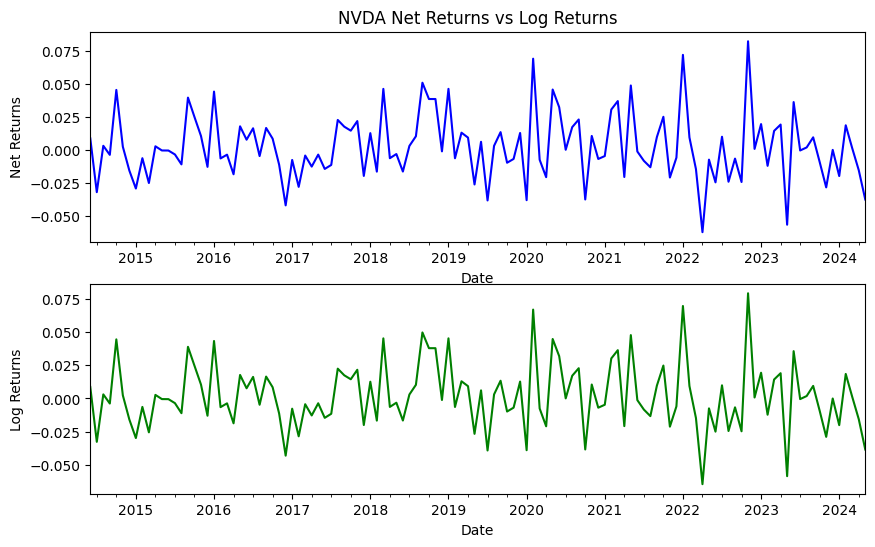

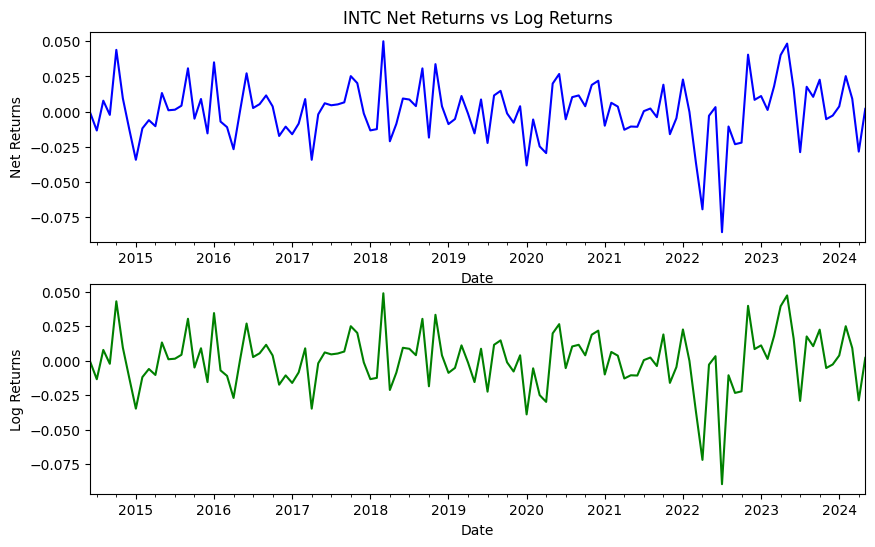

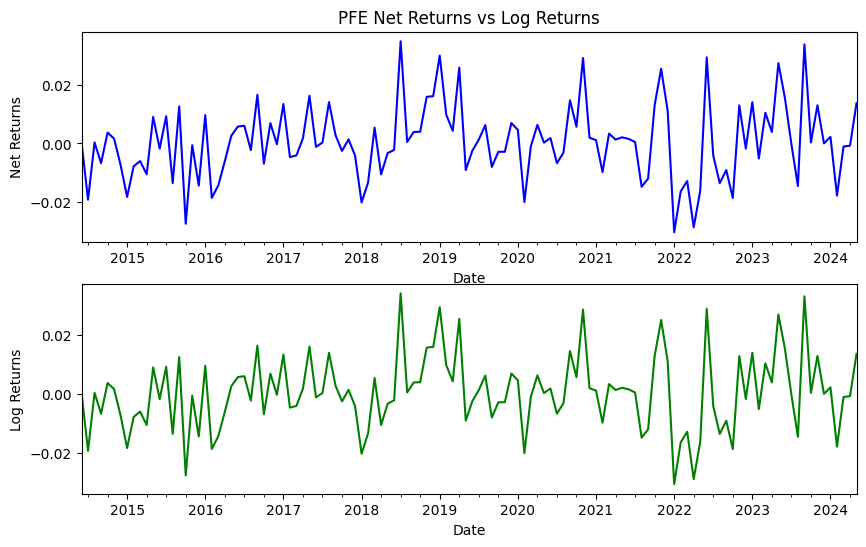

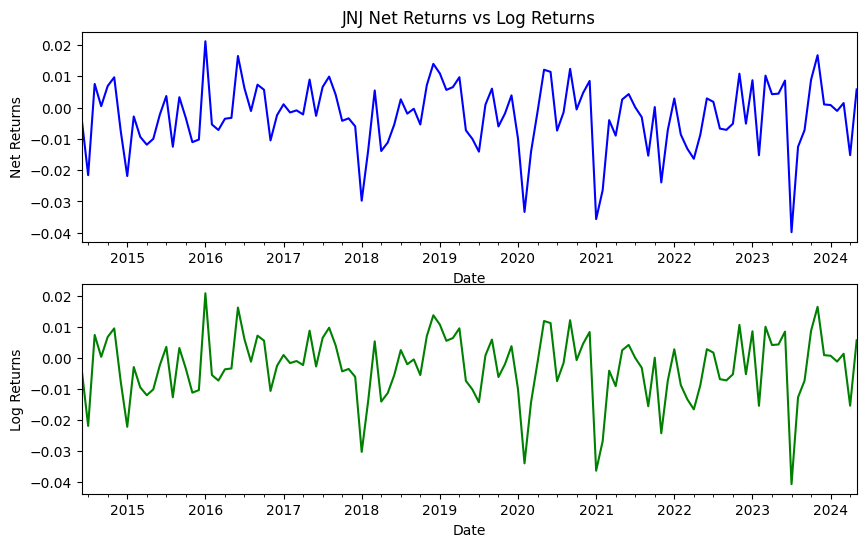

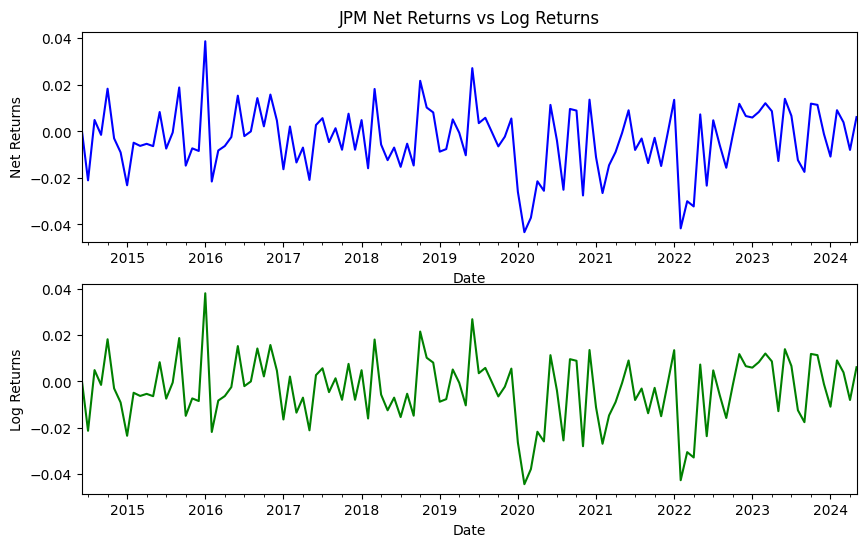

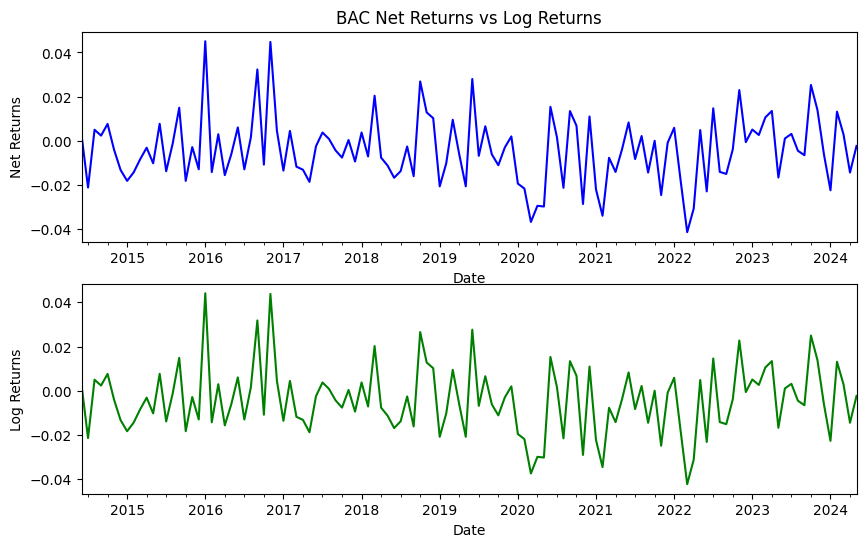

In [14]:
for ticker in tickers:
    plot_netReturns_vs_logReturns(rs_netti_mensili[ticker + "_RSnetto"], 
                                  rs_log_mensili[ticker + "_Rlog"], 
                                  ticker)

In [24]:
def plotCumulativeReturns_vs_simpleReturns(cumReturns, simpleReturns, tickertitle, count):
    #cumReturns is a series of cumulative returns
    #simpleReturns is a series of simple returns
    plt.subplot(2,1,1)
    plt.title(tickertitle + " Cumulative Returns vs Simple Returns")
    cumReturns.plot(figsize=(10,6), color="blue")
    #we add the mean of the series as a horizontal line
    plt.axhline(cumReturns.mean(), color="red", linestyle="--", linewidth=2)
    plt.ylabel("Cumulative Returns")
    plt.subplot(2,1,2)
    simpleReturns.plot(figsize=(10,6), color="green")
    plt.axhline(simpleReturns.mean(), color="red", linestyle="--", linewidth=2)
    plt.ylabel("Simple Returns")
    plt.savefig("./images/cumReturnsVsSimpleReturns" + str(count) + ".png")
    count += 1
    plt.show()

In [17]:
cumReturns_mensili = cum_df.groupby(pd.Grouper(freq="M")).last()

/var/folders/bs/1scg3gz51hj_nr803rfh_thh0000gn/T/ipykernel_12817/1154752585.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cumReturns_mensili = cum_df.groupby(pd.Grouper(freq="M")).last()


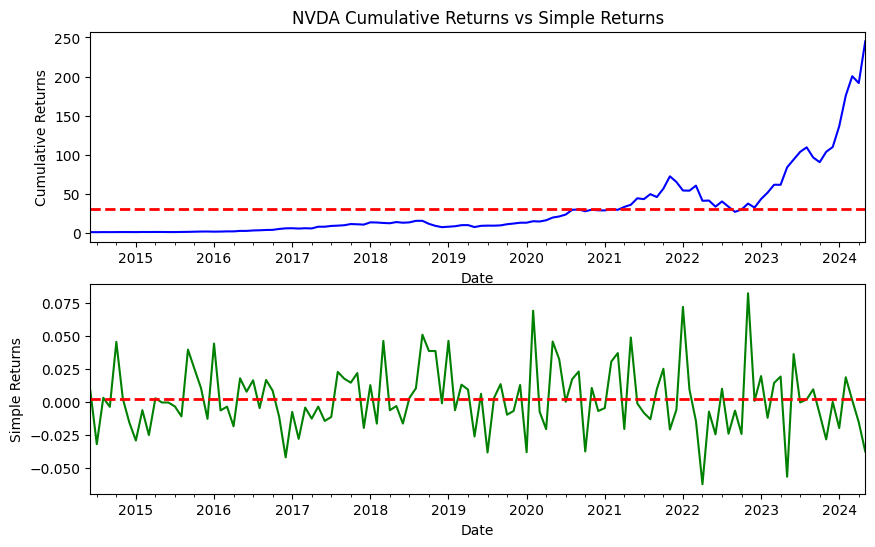

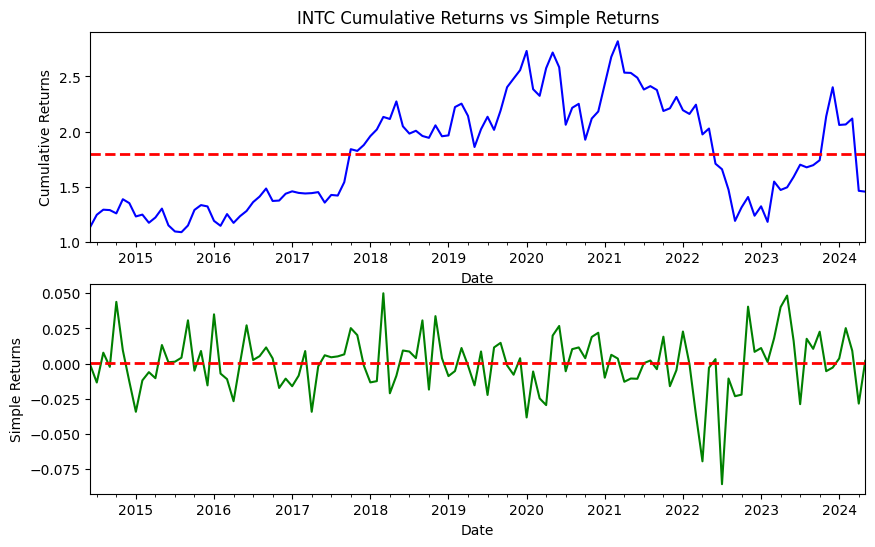

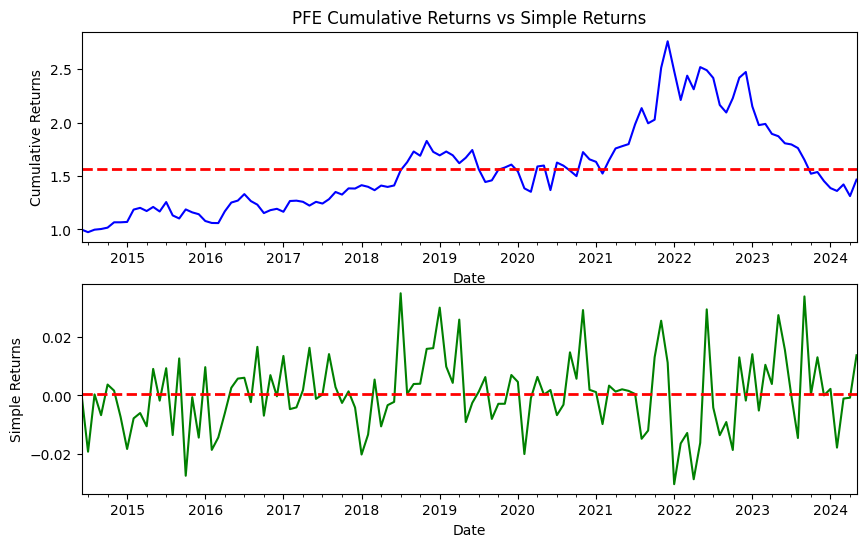

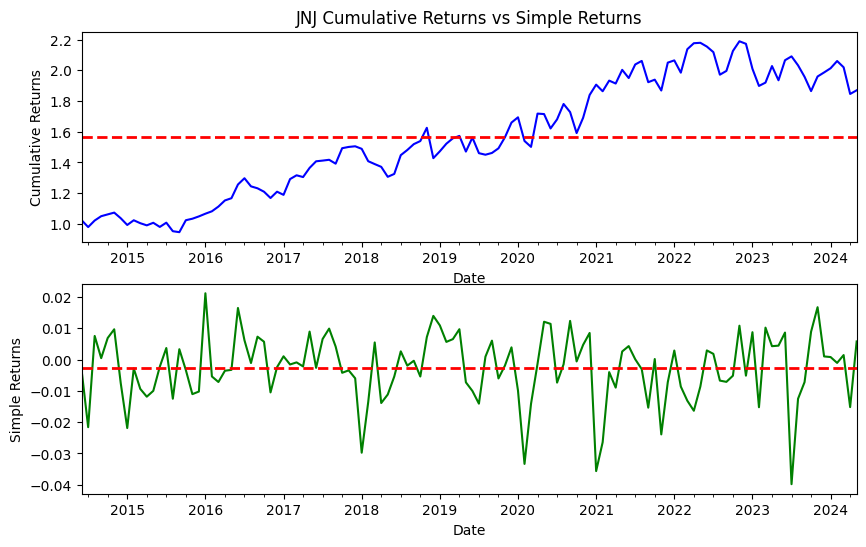

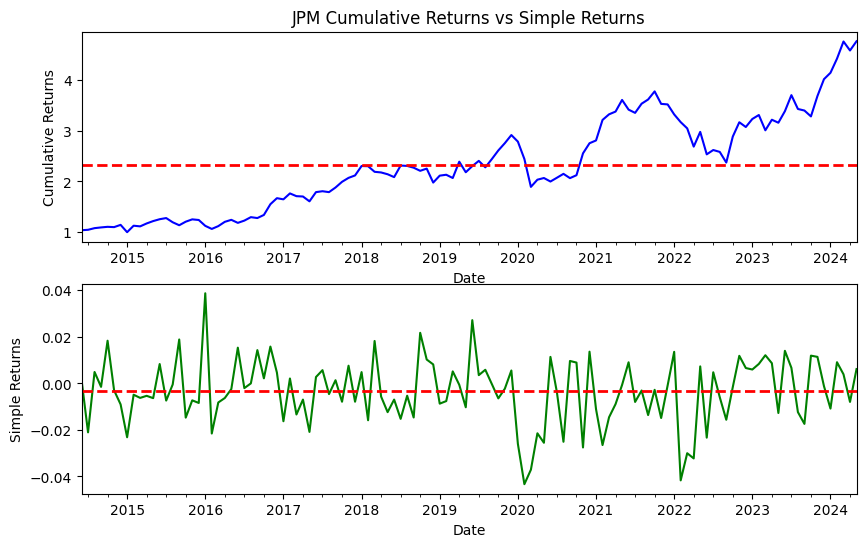

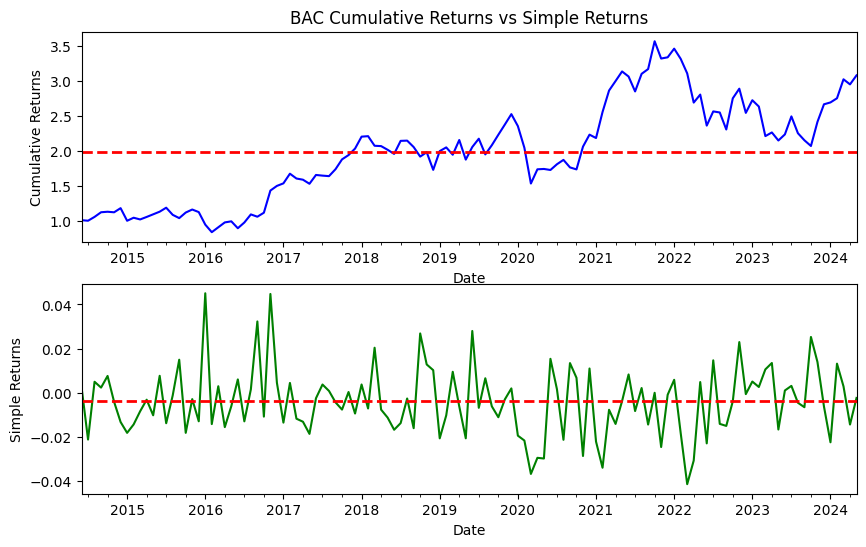

In [25]:
for ticker in tickers:
    plotCumulativeReturns_vs_simpleReturns(cumReturns_mensili[ticker + "_Rcomposito"], 
                                           rs_netti_mensili[ticker + "_RSnetto"], 
                                           ticker,
                                           0)

ISTOGRAMMI E DISPERSIONE

In [42]:
#funzione per plottare gli istogrammi di due titoli
cmap = plt.get_cmap("turbo")
def plot_histograms(df, label1, label2, title):
    plt.figure(figsize=(12,8))
    plt.hist(df[[label1, label2]], bins=25, density=True, 
             edgecolor='black', color=[cmap(0.8), cmap(0.2)])
    plt.title(title)
    plt.legend([label1, label2], fontsize=15, loc="upper right")
    plt.xlabel("Net Return")
    plt.ylabel("Frequency")
    plt.show()

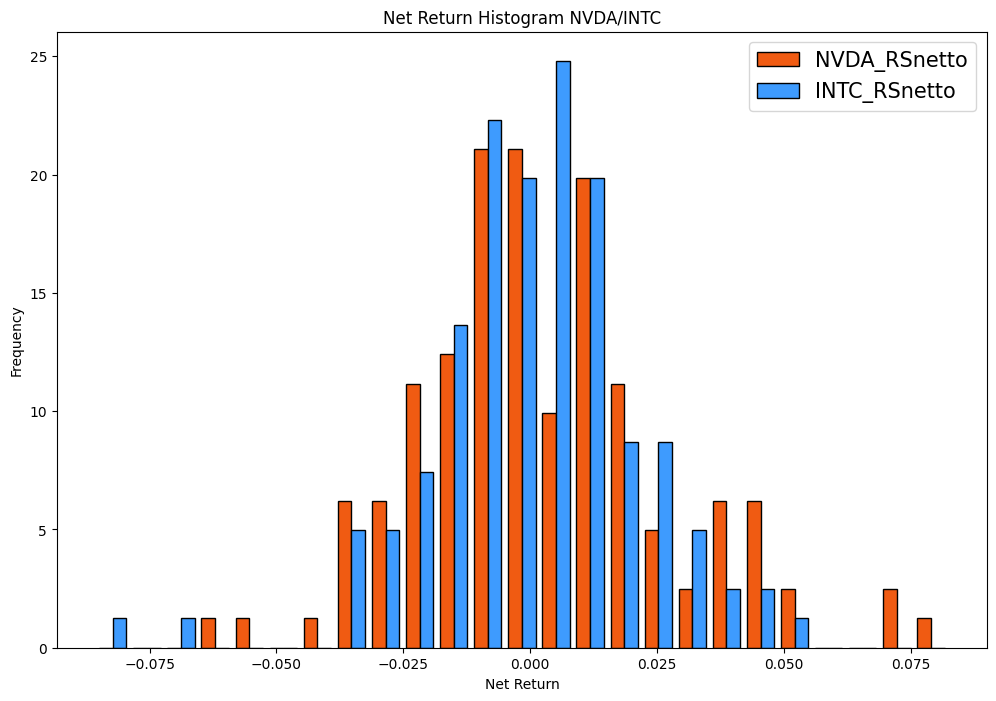

NVDA_RSnetto    0.029824
INTC_RSnetto    0.021047
dtype: float64

In [43]:
#istogramma dei titoli tecnologici
plot_histograms(rs_netti_mensili, "NVDA_RSnetto", 
                "INTC_RSnetto", 
                "Net Return Histogram NVDA/INTC")
#dispersione dei titoli tecnologici
rsNetti_df[["NVDA_RSnetto", "INTC_RSnetto"]].std()

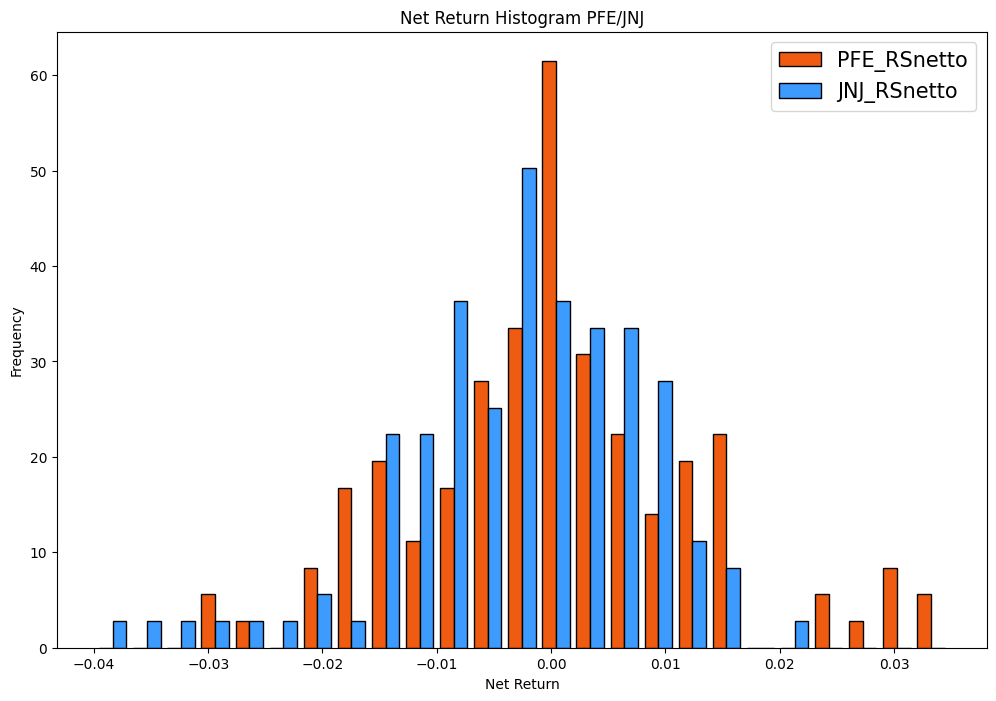

PFE_RSnetto    0.014380
JNJ_RSnetto    0.011374
dtype: float64

In [44]:
#istogramma dei titoli farmaceutici
plot_histograms(rs_netti_mensili, "PFE_RSnetto", 
                "JNJ_RSnetto", 
                "Net Return Histogram PFE/JNJ")
#dispersione dei titoli farmaceutici
rsNetti_df[["PFE_RSnetto", "JNJ_RSnetto"]].std()

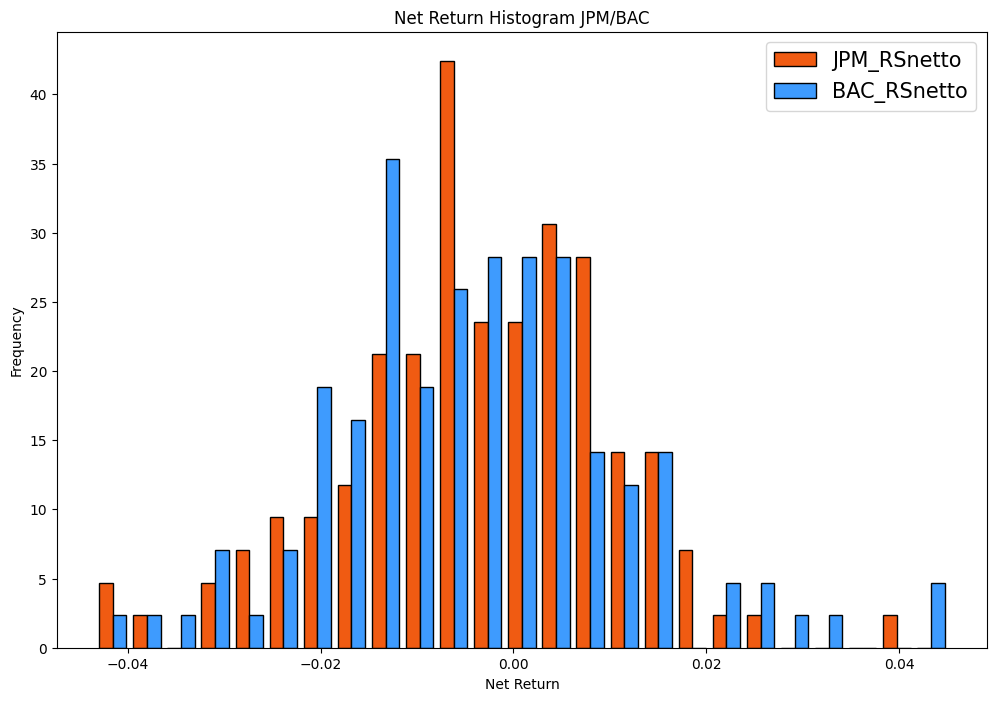

JPM_RSnetto    0.016972
BAC_RSnetto    0.019474
dtype: float64

In [45]:
#istogramma dei titoli bancari
plot_histograms(rs_netti_mensili, "JPM_RSnetto", 
                "BAC_RSnetto", 
                "Net Return Histogram JPM/BAC")
#dispersione dei titoli bancari
rsNetti_df[["JPM_RSnetto", "BAC_RSnetto"]].std()